# Identify Fraud from Enron Email
## Using Machine Learning Techniques
### by David Vartanian

## References

### Documentation links:

* http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [1]:
# notebook/visualisation imports
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# poi_id.py
#!/usr/bin/python

import sys
import pickle

from udacity import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/home/david/anaconda3/envs/udml/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'bonus', 'director_fees', 'other'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
print 'Keys:'
display(sorted(data_dict[data_dict.keys()[0]].keys()))

Keys:


['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

### Keys:

* **bonus**: Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.
* **deferral_payments**: Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.
* **deferred_income**: Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.
* **director_fees**: Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.
* **email_address**: @todo
* **exercised_stock_options**: Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.
* **expenses**: Reflects reimbursements of business expenses. May include fees paid for consulting services.
* **from_messages**: @todo
* **from_poi_to_this_person**: @todo
* **from_this_person_to_poi**: @todo
* **loan_advances**: Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.
* **long_term_incentive**: Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.
* **other**: Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.
* **poi**: @todo
* **restricted_stock**: Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.
* **restricted_stock_deferred**: Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.
* **salary**: Reflects items such as base salary, executive cash allowances, and benefits payments.
* **shared_receipt_with_poi**: @todo
* **to_messages**: @todo
* **total_payments**: @todo
* **total_stock_value**: @todo

#### Possible corruption indicator features

* bonus: irregular bonuses, not correlated with salary
* deferral_payments: high unjustified deferred payments
* deffered_income: irregular income amounts
* director_fees: irregular payments from non-employees
* exercised_stock_options: amounts mentioned in emails
* expenses: irregular reinbursements
* long_term_incentive: irregular incentives
* other: irregular amounts

#### Comments
I need to know what all variables mean in order to come up with possible outliers and feature selection/engineering.

In [4]:
import numpy as np


def summary(data, key):
    values = np.nan_to_num(np.array([data[k][key] for k in data]).astype(np.float64))
    return {'count': len(values), 
            'mean': values.mean(), 
            'std': values[values > 0].std(),  # zero means NaN converted to numeric
            'min': values[values > 0].min(),  # zero means NaN converted to numeric
            'max': values.max(), 
            'median': np.median(values[values > 0])}

display(summary(data_dict, 'bonus'))
display(summary(data_dict, 'deferral_payments'))
display(summary(data_dict, 'other'))

{'count': 146,
 'max': 97343619.0,
 'mean': 1333474.2328767122,
 'median': 769375.0,
 'min': 70000.0,
 'std': 10647802.412658392}

{'count': 146,
 'max': 32083396.0,
 'mean': 438796.52054794523,
 'median': 243952.0,
 'min': 7961.0,
 'std': 5153956.1169830719}

{'count': 146,
 'max': 42667589.0,
 'mean': 585431.79452054796,
 'median': 52382.0,
 'min': 2.0,
 'std': 4564512.8195495447}

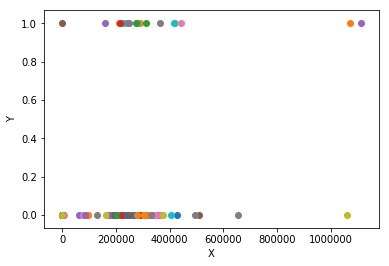

ValueError: cannot reshape array of size 452 into shape (113,1)

In [8]:
### Task 2: Remove outliers
from outlier import OutlierCleaner
from visualisation import scatter_plot

# remove known TOTAL outlier
data_dict.pop('TOTAL', 0)

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)
scatter_plot(features, labels)


cleaner = OutlierCleaner(features=np.array(features), labels=np.array(labels))
features, labels = cleaner.clean(visualise=True)
features, labels = cleaner.clean(visualise=True)
features, labels = cleaner.clean(visualise=True)
print len(features)

In [ ]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)



In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
dump_classifier_and_data(clf, my_dataset, features_list)

In [ ]:
# tester.py
from tester import main as project_tester
project_tester()

## Enron Submission Free-Response Questions

### Question 1 
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]



### Question 2
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]



### Question 3
What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]


### Question 4
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]



### Question 5
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]



### Question 6
Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

